# Importing packages and raw data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d1 = pd.read_csv('IST_South_Tower_2017.csv')
d2 = pd.read_csv('IST_South_Tower_2018.csv')
meteo = pd.read_csv('IST_meteo_data_2017_2018_2019.csv')

# Merge Consumption Data from both Years

In [2]:
# Concatenate d1 and d2 along the rows
merged_data_17_18 = pd.concat([d1, d2], ignore_index=True)
merged_data_17_18 = merged_data_17_18.rename(columns={'Date_start': 'date'})
merged_data_17_18['date'] = pd.to_datetime(merged_data_17_18['date'], format='%d-%m-%Y %H:%M')
merged_data_17_18[merged_data_17_18.isnull().any(axis = 'columns')]

,date,Power_kW


# Saving this Merged Data for later use

In [3]:
# Save merged data to a CSV file
merged_data_17_18.to_csv('IST_South_Tower_full.csv', index=False)
merged_data_17_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      17520 non-null  datetime64[ns]
 1   Power_kW  17520 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 273.9 KB


# Data Preparation Section

In [4]:
meteo = meteo.rename(columns={'yyyy-mm-dd hh:mm:ss': 'date'})
meteo.head(12)

,date,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
0,2017-01-01 00:00:00,8.72,74.6,2.138,3.774,1029,1.163,0.0,0.0
1,2017-01-01 00:05:00,8.68,74.6,1.929,3.019,1029,1.496,0.0,0.0
2,2017-01-01 00:10:00,8.69,74.5,1.824,2.516,1029,1.025,0.0,0.0
3,2017-01-01 00:15:00,8.62,75.1,2.264,3.271,1029,1.690,0.0,0.0
4,2017-01-01 00:20:00,8.63,75.0,3.061,3.774,1029,1.108,0.0,0.0
5,2017-01-01 00:25:00,8.65,75.0,2.558,3.019,1029,0.693,0.0,0.0
6,2017-01-01 00:30:00,8.59,75.2,2.809,3.774,1029,1.745,0.0,0.0
7,2017-01-01 00:35:00,8.50,75.2,2.117,2.767,1029,1.939,0.0,0.0
8,2017-01-01 00:40:00,8.47,74.9,2.390,3.271,1029,1.441,0.0,0.0
9,2017-01-01 00:45:00,8.34,75.1,2.558,3.019,1029,1.634,0.0,0.0


### Merging the Weather Data to the Data
Once this weather data is taken each 5 mins I did an hourly average for each column of data available

In [5]:
# Extract data into another DataFrame
data = meteo.iloc[:, :]  # Extract all columns
# Initialize a dictionary to store hourly average values for each column
hourly_avg_data = {}

# Iterate over each column (excluding the date column)
for column in data.columns[1:]:  # Skip the first column (date)
    # Initialize an empty list to store hourly average values for the current column
    hourly_avg_values = []
    
    # Loop through the data in sets of 12 consecutive values
    for i in range(0, len(data), 12):
        # Extract the next 12 consecutive values for the current column
        consecutive_values = data[column][i:i+12]
        
        # Calculate the average of the 12 consecutive values
        avg_value = np.round(sum(consecutive_values) / len(consecutive_values), 2)
        
        # Append the average value to the list
        hourly_avg_values.append(avg_value)
    
    # Store the hourly average values for the current column in the dictionary
    hourly_avg_data[column] = hourly_avg_values

# Convert the dictionary to a DataFrame
hourly_avg_df = pd.DataFrame(hourly_avg_data)

# Print or use hourly_avg_df as needed
hourly_avg_df
hourly_avg_df.to_csv('meteo_hourly_avg.csv', index=False)

Follows the merging of the hourly averaged weather data to the consumption data.

In [6]:
# Concatenate merged_data_17_18 with hourly_avg_df
merged_data_with_hourly_avg = pd.concat([merged_data_17_18, hourly_avg_df], axis=1)

# Print or use merged_data_with_hourly_avg as needed
merged_data_with_hourly_avg

,date,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
0,2017-01-01 00:00:00,100.810001,8.53,74.97,2.34,3.27,1029.00,1.36,0.0,0.0
1,2017-01-01 01:00:00,99.054135,7.93,76.31,2.69,3.48,1028.17,1.48,0.0,0.0
2,2017-01-01 02:00:00,98.539567,7.26,80.27,3.30,4.07,1028.00,1.42,0.0,0.0
3,2017-01-01 03:00:00,101.435784,6.83,81.33,3.53,4.42,1028.00,1.54,0.0,0.0
4,2017-01-01 04:00:00,98.481664,6.50,81.24,4.01,5.26,1028.00,0.89,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
17913,NaT,NaN,15.15,48.95,0.00,0.00,1022.33,863.12,0.0,0.0
17914,NaT,NaN,15.88,46.32,0.00,0.00,1022.00,676.42,0.0,0.0
17915,NaT,NaN,16.25,46.07,0.00,0.00,1021.75,843.34,0.0,0.0
17916,NaT,NaN,15.98,46.54,0.00,0.00,1021.08,744.66,0.0,0.0


Remotion of unnecessary NaN values that correspond to the data from 2019.

In [7]:
merged_data_with_hourly_avg[merged_data_with_hourly_avg.isna().any(axis=1)].index

Index([17520, 17521, 17522, 17523, 17524, 17525, 17526, 17527, 17528, 17529,
       ...
       17908, 17909, 17910, 17911, 17912, 17913, 17914, 17915, 17916, 17917],
      dtype='int64', length=398)

In [8]:
# Eliminate rows with NaN values
cleaned_data1 = merged_data_with_hourly_avg.dropna()

# Cleaned_data with to_datetime
cleaned_data1.loc[:, 'date'] = pd.to_datetime(cleaned_data1['date'])
cleaned_data1 = cleaned_data1.set_index('date', drop = True)
cleaned_data1

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
date,,,,,,,,,
2017-01-01 00:00:00,100.810001,8.53,74.97,2.34,3.27,1029.00,1.36,0.0,0.0
2017-01-01 01:00:00,99.054135,7.93,76.31,2.69,3.48,1028.17,1.48,0.0,0.0
2017-01-01 02:00:00,98.539567,7.26,80.27,3.30,4.07,1028.00,1.42,0.0,0.0
2017-01-01 03:00:00,101.435784,6.83,81.33,3.53,4.42,1028.00,1.54,0.0,0.0
2017-01-01 04:00:00,98.481664,6.50,81.24,4.01,5.26,1028.00,0.89,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,97.217861,20.52,21.97,0.00,0.00,1015.00,0.87,0.0,0.0
2018-12-31 20:00:00,95.928710,19.61,23.81,0.00,0.00,1015.00,0.87,0.0,0.0
2018-12-31 21:00:00,85.652000,18.88,25.47,0.00,0.00,1015.00,0.90,0.0,0.0


### Saving the full data to later use in EDA, Feature Selection, etc

In [9]:
cleaned_data1.to_csv('IST_South_Tower_full_w_meteo.csv', index=True)

# Exploratory Data Analysis - EDA
In this section multiple visualization of the data will be made.
The goal of this section is to understand:
 -  Understand the data from a general point of view;
 -  Gatter information of behavior of the data to have insight about major features and engineer features;
 -  Identify -and clean - outliers in the data.

After this is done the data is ready to star creating features from the data and/or engineer new relevant features

In [19]:
import matplotlib.pyplot as plt
data1 = pd.read_csv('IST_South_Tower_full_w_meteo.csv')
data1['date'] = pd.to_datetime(data1['date'])
data1 = data1.set_index('date', drop = True)
data1

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
date,,,,,,,,,
2017-01-01 00:00:00,100.810001,8.53,74.97,2.34,3.27,1029.00,1.36,0.0,0.0
2017-01-01 01:00:00,99.054135,7.93,76.31,2.69,3.48,1028.17,1.48,0.0,0.0
2017-01-01 02:00:00,98.539567,7.26,80.27,3.30,4.07,1028.00,1.42,0.0,0.0
2017-01-01 03:00:00,101.435784,6.83,81.33,3.53,4.42,1028.00,1.54,0.0,0.0
2017-01-01 04:00:00,98.481664,6.50,81.24,4.01,5.26,1028.00,0.89,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,97.217861,20.52,21.97,0.00,0.00,1015.00,0.87,0.0,0.0
2018-12-31 20:00:00,95.928710,19.61,23.81,0.00,0.00,1015.00,0.87,0.0,0.0
2018-12-31 21:00:00,85.652000,18.88,25.47,0.00,0.00,1015.00,0.90,0.0,0.0


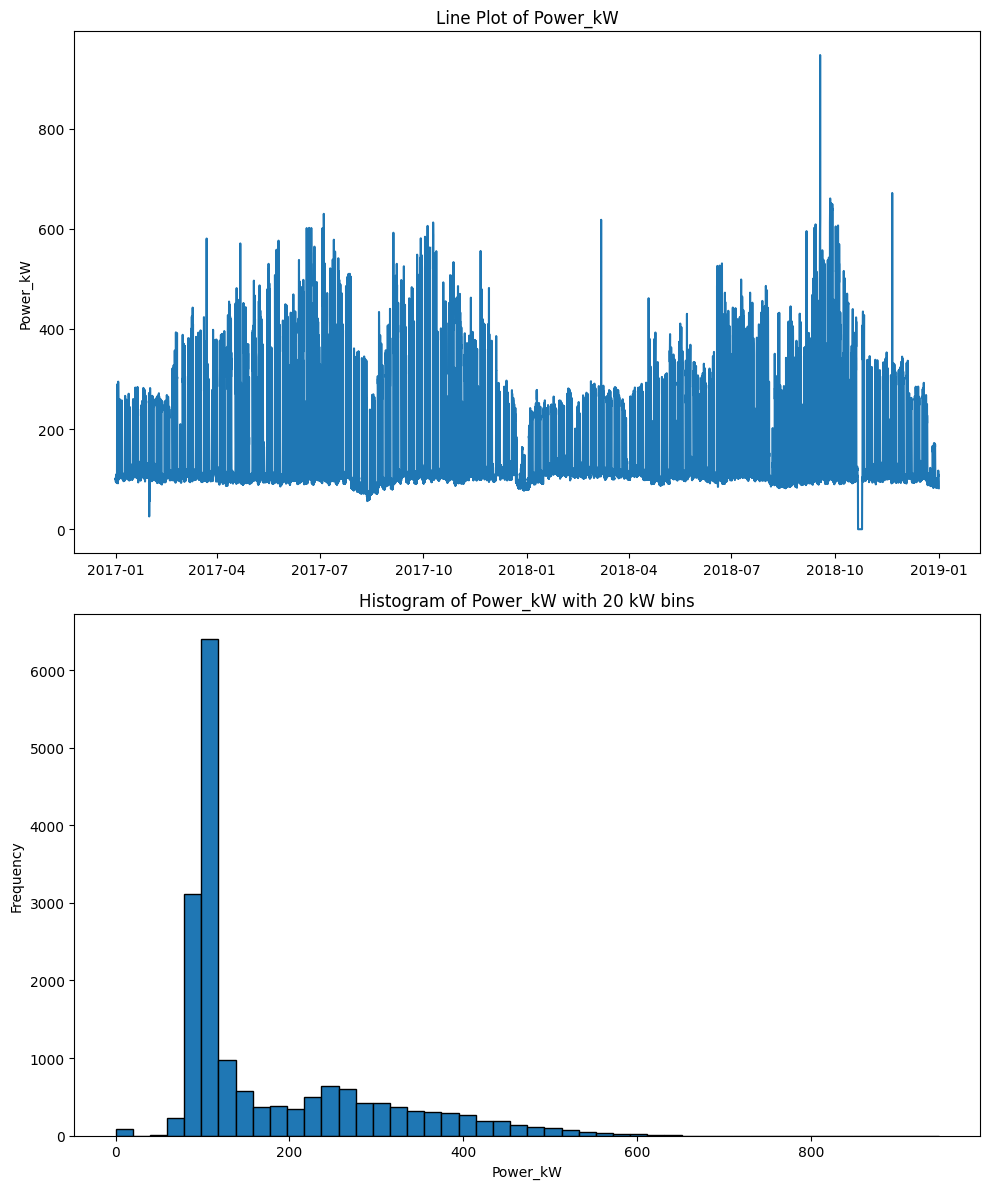

In [20]:
# Create a figure and axis object
fig, axs = plt.subplots(2, 1, figsize=(10, 12))  # 3 rows, 1 column

# Plot the line plot
axs[0].plot(data1['Power_kW'])
axs[0].set_ylabel('Power_kW')
axs[0].set_title('Line Plot of Power_kW')

# Create the histogram
max_power = data1['Power_kW'].max()
num_bins = int(max_power / 20) + 1
axs[1].hist(data1['Power_kW'], bins=num_bins, edgecolor='black')
axs[1].set_xlabel('Power_kW')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Power_kW with 20 kW bins')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### From this plots we can clearly see that we have some outliers in the lower side of consumption
A few zero consumptions, and some very low frequencies of appearance for consumption between 0-80 kW!

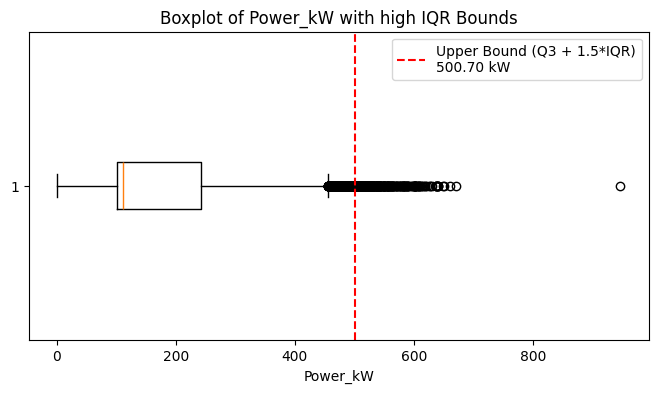

In [21]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 4)) 

# Create the horizontal boxplot
boxplot = ax.boxplot(data1['Power_kW'], vert=False)

# Calculate quartiles and IQR
q1_kw = data1['Power_kW'].quantile(0.25)
q3_kw = data1['Power_kW'].quantile(0.75)
iqr_kw = q3_kw - q1_kw

# Calculate upper and lower bounds for outliers
lower_bound_kw = q1_kw - 1.5 * iqr_kw
upper_bound_kw = (q3_kw + 1.5 * iqr_kw) * 1.1 # a tolerance of 5% just not to strict too much

# Add vertical lines for IQR bounds
#ax.axvline(lower_bound, color='r', linestyle='--', label='Lower Bound (Q1 - 1.5*IQR)')
ax.axvline(upper_bound_kw, color='r', linestyle='--', label=f'Upper Bound (Q3 + 1.5*IQR)\n{upper_bound_kw:.2f} kW')

# Set labels and title
ax.set_xlabel('Power_kW')
ax.set_title('Boxplot of Power_kW with high IQR Bounds')
ax.legend()

# Show the plot
plt.show()

#### Concerning the upper consumptions:
> The data as a big number of values that are outside of Q3 + 1.5 IQR. In the plot the value for the upper bound is even with a tolerance of 10% which is already a big confidence level. Hence we will rule out these values of "over"-consumption.

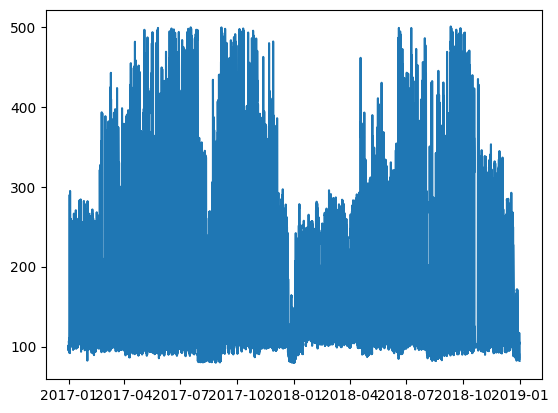

In [22]:
# Clean outliers above the upper bound and below 80 kW
data2 = data1[(data1['Power_kW'] >= 80) & (data1['Power_kW'] <= upper_bound_kw)]
# Plot the line plot
plt.plot(data2['Power_kW'])

### Data Completion

There is not major hole in the data and the eliminated outliers from the consumption are a very few part of the complete set. Hence I don't see the necessity to do data completion.

In [23]:
data2

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
date,,,,,,,,,
2017-01-01 00:00:00,100.810001,8.53,74.97,2.34,3.27,1029.00,1.36,0.0,0.0
2017-01-01 01:00:00,99.054135,7.93,76.31,2.69,3.48,1028.17,1.48,0.0,0.0
2017-01-01 02:00:00,98.539567,7.26,80.27,3.30,4.07,1028.00,1.42,0.0,0.0
2017-01-01 03:00:00,101.435784,6.83,81.33,3.53,4.42,1028.00,1.54,0.0,0.0
2017-01-01 04:00:00,98.481664,6.50,81.24,4.01,5.26,1028.00,0.89,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,97.217861,20.52,21.97,0.00,0.00,1015.00,0.87,0.0,0.0
2018-12-31 20:00:00,95.928710,19.61,23.81,0.00,0.00,1015.00,0.87,0.0,0.0
2018-12-31 21:00:00,85.652000,18.88,25.47,0.00,0.00,1015.00,0.90,0.0,0.0


#### Now let's do the same procedure for the temperature

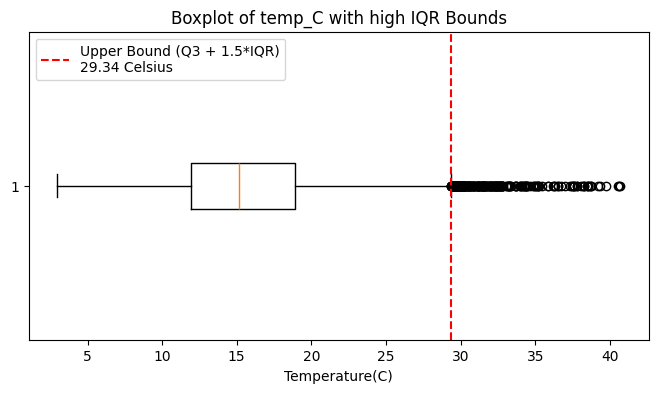

In [24]:
 # Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 4)) 

# Create the horizontal boxplot
boxplot = ax.boxplot(data1['temp_C'], vert=False)

# Calculate quartiles and IQR
q1_t = data1['temp_C'].quantile(0.25)
q3_t = data1['temp_C'].quantile(0.75)
iqr_t = q3_t - q1_t

# Calculate upper and lower bounds for outliers
lower_bound_t = q1_t - 1.5 * iqr_t
upper_bound_t = q3_t + 1.5 * iqr_t # a tolerance of 5% just not to strict too much

# Add vertical lines for IQR bounds
#ax.axvline(lower_bound, color='r', linestyle='--', label='Lower Bound (Q1 - 1.5*IQR)')
ax.axvline(upper_bound_t, color='r', linestyle='--', label=f'Upper Bound (Q3 + 1.5*IQR)\n{upper_bound_t:.2f} Celsius')

# Set labels and title
ax.set_xlabel('Temperature(C)')
ax.set_title('Boxplot of temp_C with high IQR Bounds')
ax.legend()

# Show the plot
plt.show()

In [88]:
data2 = data2[(data2['temp_C'] <= 32)] # gave a bit of tolerance here because temperature are a bit hard to say they are outliers.
data2

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
date,,,,,,,,,
2017-01-01 00:00:00,100.810001,8.53,74.97,2.34,3.27,1029.00,1.36,0.0,0.0
2017-01-01 01:00:00,99.054135,7.93,76.31,2.69,3.48,1028.17,1.48,0.0,0.0
2017-01-01 02:00:00,98.539567,7.26,80.27,3.30,4.07,1028.00,1.42,0.0,0.0
2017-01-01 03:00:00,101.435784,6.83,81.33,3.53,4.42,1028.00,1.54,0.0,0.0
2017-01-01 04:00:00,98.481664,6.50,81.24,4.01,5.26,1028.00,0.89,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,97.217861,20.52,21.97,0.00,0.00,1015.00,0.87,0.0,0.0
2018-12-31 20:00:00,95.928710,19.61,23.81,0.00,0.00,1015.00,0.87,0.0,0.0
2018-12-31 21:00:00,85.652000,18.88,25.47,0.00,0.00,1015.00,0.90,0.0,0.0


#### There is some outliers in the temperature with the IQR method. With this I'll just assume leave the rest of weather data as is. If some of the features selected may be one of the untreated weather data I do the outliers cleaning later.

#### data_2 is now ready for starting to Feature Elicitation, Extraction and most importantly, Feature Enginerring.

In [26]:
data2.to_csv('IST_South_Tower_full_w_meteo_to_features.csv', index=True)

# Feature Elicitation, Extraction and Engineering
In this section feature elicitation, extraction and engineering is the goal.

After this is done the data is ready to start feeding models.

In [27]:
data3 = pd.read_csv('IST_South_Tower_full_w_meteo_to_features.csv')
data3['date'] = pd.to_datetime(data3['date'])
data3 = data3.set_index('date', drop = True)
data3

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
date,,,,,,,,,
2017-01-01 00:00:00,100.810001,8.53,74.97,2.34,3.27,1029.00,1.36,0.0,0.0
2017-01-01 01:00:00,99.054135,7.93,76.31,2.69,3.48,1028.17,1.48,0.0,0.0
2017-01-01 02:00:00,98.539567,7.26,80.27,3.30,4.07,1028.00,1.42,0.0,0.0
2017-01-01 03:00:00,101.435784,6.83,81.33,3.53,4.42,1028.00,1.54,0.0,0.0
2017-01-01 04:00:00,98.481664,6.50,81.24,4.01,5.26,1028.00,0.89,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,97.217861,20.52,21.97,0.00,0.00,1015.00,0.87,0.0,0.0
2018-12-31 20:00:00,95.928710,19.61,23.81,0.00,0.00,1015.00,0.87,0.0,0.0
2018-12-31 21:00:00,85.652000,18.88,25.47,0.00,0.00,1015.00,0.90,0.0,0.0


#### Create feature of Hour, Week Day, Holiday and Power(-1)

In [28]:
data3['hour'] = data3.index.hour
data3['week_day'] = data3.index.dayofweek
import holidays

# Create a holiday object for Portugal
pt_holidays = holidays.Portugal()

# Create a new column to store whether each date is a holiday
data3['holiday'] = data3.index.map(lambda x: x in pt_holidays)
data3['holiday'] = data3['holiday'].astype(int)
data3['power_m1'] = data3['Power_kW'].shift(1)
data3 = data3.dropna()
data3

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,hour,week_day,holiday,power_m1
date,,,,,,,,,,,,,
2017-01-01 01:00:00,99.054135,7.93,76.31,2.69,3.48,1028.17,1.48,0.0,0.0,1,6,1,100.810001
2017-01-01 02:00:00,98.539567,7.26,80.27,3.30,4.07,1028.00,1.42,0.0,0.0,2,6,1,99.054135
2017-01-01 03:00:00,101.435784,6.83,81.33,3.53,4.42,1028.00,1.54,0.0,0.0,3,6,1,98.539567
2017-01-01 04:00:00,98.481664,6.50,81.24,4.01,5.26,1028.00,0.89,0.0,0.0,4,6,1,101.435784
2017-01-01 05:00:00,97.805844,6.01,81.01,4.55,6.08,1028.00,1.38,0.0,0.0,5,6,1,98.481664
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,97.217861,20.52,21.97,0.00,0.00,1015.00,0.87,0.0,0.0,19,0,0,105.247736
2018-12-31 20:00:00,95.928710,19.61,23.81,0.00,0.00,1015.00,0.87,0.0,0.0,20,0,0,97.217861
2018-12-31 21:00:00,85.652000,18.88,25.47,0.00,0.00,1015.00,0.90,0.0,0.0,21,0,0,95.928710


### Next I will evaluate the possibility of a feature that represents morning, lunch, afternoon, evening and night time.
> With this results I'll calculate the average consumption for these time of the day to see if there is a clear difference between these time of the days and conclude in a simplistic way if time of the day has an influence in Power, hence, the possibility of featuring that.

In [29]:
# 1: Morning
# 2: Lunch
# 3: Afternoon
# 4: Evening
# 5: Night
data3['time_of_day'] = 1 
data3.loc[(data3['hour'] > 7) & (data3['hour'] <= 12), 'time_of_day'] = 1
data3.loc[(data3['hour'] > 12) & (data3['hour'] <= 14), 'time_of_day'] = 2
data3.loc[(data3['hour'] > 14) & (data3['hour'] <= 19), 'time_of_day'] = 3
data3.loc[(data3['hour'] > 19) & (data3['hour'] <= 22), 'time_of_day'] = 4
data3.loc[(data3['hour'] > 22) | (data3['hour'] <= 7), 'time_of_day'] = 5
data3

C:\Users\vamor\AppData\Local\Temp\ipykernel_18228\1611966681.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['time_of_day'] = 1


,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,hour,week_day,holiday,power_m1,time_of_day
date,,,,,,,,,,,,,,
2017-01-01 01:00:00,99.054135,7.93,76.31,2.69,3.48,1028.17,1.48,0.0,0.0,1,6,1,100.810001,5
2017-01-01 02:00:00,98.539567,7.26,80.27,3.30,4.07,1028.00,1.42,0.0,0.0,2,6,1,99.054135,5
2017-01-01 03:00:00,101.435784,6.83,81.33,3.53,4.42,1028.00,1.54,0.0,0.0,3,6,1,98.539567,5
2017-01-01 04:00:00,98.481664,6.50,81.24,4.01,5.26,1028.00,0.89,0.0,0.0,4,6,1,101.435784,5
2017-01-01 05:00:00,97.805844,6.01,81.01,4.55,6.08,1028.00,1.38,0.0,0.0,5,6,1,98.481664,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,97.217861,20.52,21.97,0.00,0.00,1015.00,0.87,0.0,0.0,19,0,0,105.247736,3
2018-12-31 20:00:00,95.928710,19.61,23.81,0.00,0.00,1015.00,0.87,0.0,0.0,20,0,0,97.217861,4
2018-12-31 21:00:00,85.652000,18.88,25.47,0.00,0.00,1015.00,0.90,0.0,0.0,21,0,0,95.928710,4


In [30]:
# Group the data by the 'time_period' column and aggregate the 'Power_kW' values into lists
power_by_time_of_day = data3.groupby('time_of_day')['Power_kW'].apply(list)

# Calculate the average for each time period
average_power_by_time_of_day = {time_of_day: pd.Series(values).describe() for time_of_day, values in power_by_time_of_day.items()}
print(average_power_by_time_of_day)

{1: count    3509.000000
mean      243.104438
std       110.605446
min        80.415211
25%       121.964297
50%       247.593275
75%       326.315111
max       499.438779
dtype: float64, 2: count    1375.000000
mean      259.036912
std       115.079619
min        80.415211
25%       126.653853
50%       261.261761
75%       344.885972
max       500.612560
dtype: float64, 3: count    3457.000000
mean      220.287066
std       109.628468
min        80.135312
25%       113.416139
50%       202.744839
75%       285.881686
max       498.828289
dtype: float64, 4: count    2102.000000
mean      112.675799
std        17.180531
min        80.021692
25%       100.711894
50%       109.140968
75%       120.771396
max       172.021335
dtype: float64, 5: count    6340.000000
mean      107.677877
std        33.891504
min        80.025188
25%        96.803093
50%       102.221183
75%       108.122540
max       498.544240
dtype: float64}


### From the average values there is pratically no difference between Morning, Lunch and Afternoon. And no difference between Evening and Night.
> ALthough, between each group - Day and Night - there is a sound difference of Power_kW.
> 
In this manner I'll create a feature that is Morning(=1), Day(=0.5) and Night(=0)

> I kept morning because is when most laboratories take place and include lunch time because of the restaurant.

In [31]:
# Delete the existing 'time_period' column if it exists
if 'time_period' in data3.columns:
    del data3['time_period']

# Create the new 'time_of_day' column
data3.loc[:, 'time_of_day'] = 0  # Initialize all values as night (0)
data3.loc[(data3['hour'] >= 7) & (data3['hour'] <= 14), 'time_of_day'] = 1
data3.loc[(data3['hour'] > 14) & (data3['hour'] <= 19), 'time_of_day'] = 0.5
data3

C:\Users\vamor\AppData\Local\Temp\ipykernel_18228\3709318519.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data3.loc[(data3['hour'] > 14) & (data3['hour'] <= 19), 'time_of_day'] = 0.5


,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,hour,week_day,holiday,power_m1,time_of_day
date,,,,,,,,,,,,,,
2017-01-01 01:00:00,99.054135,7.93,76.31,2.69,3.48,1028.17,1.48,0.0,0.0,1,6,1,100.810001,0.0
2017-01-01 02:00:00,98.539567,7.26,80.27,3.30,4.07,1028.00,1.42,0.0,0.0,2,6,1,99.054135,0.0
2017-01-01 03:00:00,101.435784,6.83,81.33,3.53,4.42,1028.00,1.54,0.0,0.0,3,6,1,98.539567,0.0
2017-01-01 04:00:00,98.481664,6.50,81.24,4.01,5.26,1028.00,0.89,0.0,0.0,4,6,1,101.435784,0.0
2017-01-01 05:00:00,97.805844,6.01,81.01,4.55,6.08,1028.00,1.38,0.0,0.0,5,6,1,98.481664,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,97.217861,20.52,21.97,0.00,0.00,1015.00,0.87,0.0,0.0,19,0,0,105.247736,0.5
2018-12-31 20:00:00,95.928710,19.61,23.81,0.00,0.00,1015.00,0.87,0.0,0.0,20,0,0,97.217861,0.0
2018-12-31 21:00:00,85.652000,18.88,25.47,0.00,0.00,1015.00,0.90,0.0,0.0,21,0,0,95.928710,0.0


### Let's do the same for Season
> Winter, from December to March, 1
> 
> Spring, from March to June, 2
> 
> Summer, from June to September, 3
> 
> Outumn, from September to December, 4

In [32]:
# Create the 'season' column
data3['season'] = 0  # Initialize all values as winter (0)
data3.loc[(data3.index.month >= 12) | (data3.index.month < 3), 'season'] = 1  # Set winter (1) for December to March
data3.loc[(data3.index.month >= 3) & (data3.index.month < 6), 'season'] = 2  # Set spring (2) for March to June
data3.loc[(data3.index.month >= 6) & (data3.index.month < 9), 'season'] = 3  # Set summer (3) for June to September
data3.loc[(data3.index.month >= 9) & (data3.index.month < 12), 'season'] = 4  # Set autumn (4) for September to December

# Display the DataFrame with the new feature
data3

C:\Users\vamor\AppData\Local\Temp\ipykernel_18228\1807683669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['season'] = 0  # Initialize all values as winter (0)


,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,hour,week_day,holiday,power_m1,time_of_day,season
date,,,,,,,,,,,,,,,
2017-01-01 01:00:00,99.054135,7.93,76.31,2.69,3.48,1028.17,1.48,0.0,0.0,1,6,1,100.810001,0.0,1
2017-01-01 02:00:00,98.539567,7.26,80.27,3.30,4.07,1028.00,1.42,0.0,0.0,2,6,1,99.054135,0.0,1
2017-01-01 03:00:00,101.435784,6.83,81.33,3.53,4.42,1028.00,1.54,0.0,0.0,3,6,1,98.539567,0.0,1
2017-01-01 04:00:00,98.481664,6.50,81.24,4.01,5.26,1028.00,0.89,0.0,0.0,4,6,1,101.435784,0.0,1
2017-01-01 05:00:00,97.805844,6.01,81.01,4.55,6.08,1028.00,1.38,0.0,0.0,5,6,1,98.481664,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,97.217861,20.52,21.97,0.00,0.00,1015.00,0.87,0.0,0.0,19,0,0,105.247736,0.5,1
2018-12-31 20:00:00,95.928710,19.61,23.81,0.00,0.00,1015.00,0.87,0.0,0.0,20,0,0,97.217861,0.0,1
2018-12-31 21:00:00,85.652000,18.88,25.47,0.00,0.00,1015.00,0.90,0.0,0.0,21,0,0,95.928710,0.0,1


In [33]:
# Group the data by the 'season' column and aggregate the 'Power_kW' values into lists
power_by_season = data3.groupby('season')['Power_kW'].apply(list)

# Calculate the average for each season
average_power_by_season = {season: pd.Series(values).describe() for season, values in power_by_season.items()}
print(average_power_by_season)

{1: count    4283.000000
mean      146.821068
std        62.019517
min        80.025188
25%       102.680142
50%       112.228810
75%       196.530371
max       393.205390
dtype: float64, 2: count    4392.000000
mean      169.397480
std        96.629899
min        85.327309
25%       102.138207
50%       111.656340
75%       237.446900
max       498.828289
dtype: float64, 3: count    4001.000000
mean      188.562806
std       123.227607
min        80.021692
25%        97.785523
50%       110.145850
75%       288.599170
max       499.537322
dtype: float64, 4: count    4107.000000
mean      185.784204
std       118.400654
min        80.076536
25%       101.221108
50%       112.398585
75%       283.218061
max       500.612560
dtype: float64}


#### The difference is not much between seasons, so maybe this feature would not influence much the prediction of the model, hence I'll not include this feature about the Season of the Year. :(

In [34]:
# Delete the existing 'time_period' column if it exists
if 'season' in data3.columns:
    del data3['season']

data3

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,hour,week_day,holiday,power_m1,time_of_day
date,,,,,,,,,,,,,,
2017-01-01 01:00:00,99.054135,7.93,76.31,2.69,3.48,1028.17,1.48,0.0,0.0,1,6,1,100.810001,0.0
2017-01-01 02:00:00,98.539567,7.26,80.27,3.30,4.07,1028.00,1.42,0.0,0.0,2,6,1,99.054135,0.0
2017-01-01 03:00:00,101.435784,6.83,81.33,3.53,4.42,1028.00,1.54,0.0,0.0,3,6,1,98.539567,0.0
2017-01-01 04:00:00,98.481664,6.50,81.24,4.01,5.26,1028.00,0.89,0.0,0.0,4,6,1,101.435784,0.0
2017-01-01 05:00:00,97.805844,6.01,81.01,4.55,6.08,1028.00,1.38,0.0,0.0,5,6,1,98.481664,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,97.217861,20.52,21.97,0.00,0.00,1015.00,0.87,0.0,0.0,19,0,0,105.247736,0.5
2018-12-31 20:00:00,95.928710,19.61,23.81,0.00,0.00,1015.00,0.87,0.0,0.0,20,0,0,97.217861,0.0
2018-12-31 21:00:00,85.652000,18.88,25.47,0.00,0.00,1015.00,0.90,0.0,0.0,21,0,0,95.928710,0.0


In [35]:
data3['temp_C'].describe()

count    16783.000000
mean        15.669926
std          4.977020
min          2.940000
25%         11.930000
50%         15.000000
75%         18.800000
max         32.000000
Name: temp_C, dtype: float64

#### Considering 15.7 approx 16 the reference temperature for heating degree hour creation

In [36]:
data3.loc[:, 'hdh'] = np.maximum(0, 16 - data3['temp_C'])
data3

C:\Users\vamor\AppData\Local\Temp\ipykernel_18228\3171182123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.loc[:, 'hdh'] = np.maximum(0, 16 - data3['temp_C'])


,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,hour,week_day,holiday,power_m1,time_of_day,hdh
date,,,,,,,,,,,,,,,
2017-01-01 01:00:00,99.054135,7.93,76.31,2.69,3.48,1028.17,1.48,0.0,0.0,1,6,1,100.810001,0.0,8.07
2017-01-01 02:00:00,98.539567,7.26,80.27,3.30,4.07,1028.00,1.42,0.0,0.0,2,6,1,99.054135,0.0,8.74
2017-01-01 03:00:00,101.435784,6.83,81.33,3.53,4.42,1028.00,1.54,0.0,0.0,3,6,1,98.539567,0.0,9.17
2017-01-01 04:00:00,98.481664,6.50,81.24,4.01,5.26,1028.00,0.89,0.0,0.0,4,6,1,101.435784,0.0,9.50
2017-01-01 05:00:00,97.805844,6.01,81.01,4.55,6.08,1028.00,1.38,0.0,0.0,5,6,1,98.481664,0.0,9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,97.217861,20.52,21.97,0.00,0.00,1015.00,0.87,0.0,0.0,19,0,0,105.247736,0.5,0.00
2018-12-31 20:00:00,95.928710,19.61,23.81,0.00,0.00,1015.00,0.87,0.0,0.0,20,0,0,97.217861,0.0,0.00
2018-12-31 21:00:00,85.652000,18.88,25.47,0.00,0.00,1015.00,0.90,0.0,0.0,21,0,0,95.928710,0.0,0.00


### Between Power_kW and Solar_irradiation looks like there is a relantioship between them, because, when consumption is high, solar irradiation goes up and vice-versa
> However, power consumption doesn't vary so abruptly from the average while solar irradiation can go rapidly from 300 to 0.8
>
Looks like a first order system therefore something similar with a sigmoid function that grows very fast but after a short range the consumption is basically the same.

In [37]:
power_avg = data3['Power_kW'].mean()
data3['kW_solar_rel'] = (data3['Power_kW'] / power_avg) * (1 + np.exp(-data3['solarRad_W/m2']))
data3

C:\Users\vamor\AppData\Local\Temp\ipykernel_18228\3835590263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['kW_solar_rel'] = (data3['Power_kW'] / power_avg) * (1 + np.exp(-data3['solarRad_W/m2']))


,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,hour,week_day,holiday,power_m1,time_of_day,hdh,kW_solar_rel
date,,,,,,,,,,,,,,,,
2017-01-01 01:00:00,99.054135,7.93,76.31,2.69,3.48,1028.17,1.48,0.0,0.0,1,6,1,100.810001,0.0,8.07,0.706109
2017-01-01 02:00:00,98.539567,7.26,80.27,3.30,4.07,1028.00,1.42,0.0,0.0,2,6,1,99.054135,0.0,8.74,0.710495
2017-01-01 03:00:00,101.435784,6.83,81.33,3.53,4.42,1028.00,1.54,0.0,0.0,3,6,1,98.539567,0.0,9.17,0.715279
2017-01-01 04:00:00,98.481664,6.50,81.24,4.01,5.26,1028.00,0.89,0.0,0.0,4,6,1,101.435784,0.0,9.50,0.806688
2017-01-01 05:00:00,97.805844,6.01,81.01,4.55,6.08,1028.00,1.38,0.0,0.0,5,6,1,98.481664,0.0,9.99,0.710808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,97.217861,20.52,21.97,0.00,0.00,1015.00,0.87,0.0,0.0,19,0,0,105.247736,0.5,0.00,0.801019
2018-12-31 20:00:00,95.928710,19.61,23.81,0.00,0.00,1015.00,0.87,0.0,0.0,20,0,0,97.217861,0.0,0.00,0.790397
2018-12-31 21:00:00,85.652000,18.88,25.47,0.00,0.00,1015.00,0.90,0.0,0.0,21,0,0,95.928710,0.0,0.00,0.699565


### A Remark about the Features
A bunch of features were created by analysing data and taking into account that this is a causal problem I tried to interpret data in a physical way to try to find relationship between them. Though after Feature Selection the feature created may not be relevant.

>Nevertheless, after Feature Selection I can do a reaccessment of the features available because I'll know more or less their relevance to the prediction provided to the model.

This is an iterative process...

In [38]:
data3.to_csv('IST_South_Tower_full_w_meteo_with_features1.csv', index=True)

# Feature Selection
There are many ways of feature selection, ie, to see what features exist in the data matter to the models prediction.
> Like said before, many of the features, pre-existing ones and created ones, may be useless to the model after Feature Selection

That will make me go back and try new features. Let's see.

In [39]:
data4 = pd.read_csv('IST_South_Tower_full_w_meteo_with_features1.csv')
data4['date'] = pd.to_datetime(data4['date'])
data4 = data4.set_index('date', drop = True)
data4

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,hour,week_day,holiday,power_m1,time_of_day,hdh,kW_solar_rel
date,,,,,,,,,,,,,,,,
2017-01-01 01:00:00,99.054135,7.93,76.31,2.69,3.48,1028.17,1.48,0.0,0.0,1,6,1,100.810001,0.0,8.07,0.706109
2017-01-01 02:00:00,98.539567,7.26,80.27,3.30,4.07,1028.00,1.42,0.0,0.0,2,6,1,99.054135,0.0,8.74,0.710495
2017-01-01 03:00:00,101.435784,6.83,81.33,3.53,4.42,1028.00,1.54,0.0,0.0,3,6,1,98.539567,0.0,9.17,0.715279
2017-01-01 04:00:00,98.481664,6.50,81.24,4.01,5.26,1028.00,0.89,0.0,0.0,4,6,1,101.435784,0.0,9.50,0.806688
2017-01-01 05:00:00,97.805844,6.01,81.01,4.55,6.08,1028.00,1.38,0.0,0.0,5,6,1,98.481664,0.0,9.99,0.710808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,97.217861,20.52,21.97,0.00,0.00,1015.00,0.87,0.0,0.0,19,0,0,105.247736,0.5,0.00,0.801019
2018-12-31 20:00:00,95.928710,19.61,23.81,0.00,0.00,1015.00,0.87,0.0,0.0,20,0,0,97.217861,0.0,0.00,0.790397
2018-12-31 21:00:00,85.652000,18.88,25.47,0.00,0.00,1015.00,0.90,0.0,0.0,21,0,0,95.928710,0.0,0.00,0.699565


### First Using a Filter Method for Quick Results and Estimation of important features

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

Z = data4.values

Y = Z[:, 0]
X = Z[:, 1:15]

selector = SelectKBest(score_func=f_regression, k=6)
selector.fit(X, Y)
feature_scores = selector.scores_
print(feature_scores)

features_results = selector.transform(X)
print(features_results)

[2.35026324e+02 2.66111039e+01 2.64597298e+00 3.75322341e+00
 1.00933923e+01 3.32553927e+02 9.65282895e-01 1.92172114e+01
 4.43875466e+02 1.74447638e+03 1.47353056e+02 6.27048464e+04
 8.18982172e+03 3.03580388e+02]
[[  1.48        1.          6.        100.8100005   0.          8.07     ]
 [  1.42        2.          6.         99.0541345   0.          8.74     ]
 [  1.54        3.          6.         98.539567    0.          9.17     ]
 ...
 [  0.9        21.          0.         95.9287105   0.          0.       ]
 [  0.78       22.          0.         85.652       0.          0.       ]
 [  1.         23.          0.         90.360675    0.          0.       ]]


#### KBest, k = 6
> I tested multiple k(3,5,6) and the results vary a bit but Power-1, weekday and the engineered feature time_of_day are always selected.

From k = 6 the best features, for now, are:
> Solar Radiation
> 
> Hour
> 
> Power-1
> 
> time_of_day
> 
> HDH
> 
> week day

From this very quick computation I already have some estimation on what are the best feature. It is worth noting that this filter methods may have issues on analysing interactions among features generally can not be explicitly incorporated like pex not having a linear dependence with the output.

### Using a Wrapper Method

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso # useful when large number of features and want to shrink some coefficients to zero.
from sklearn.linear_model import LinearRegression
# Define the Lasso model
model = Lasso()
# model = LinearRegression() uncomment to see the difference

# Using 1 feature
rfe1 = RFE(model, n_features_to_select=3)

# Using 2 features
rfe2 = RFE(model, n_features_to_select=5)

# Using 3 features
rfe3 = RFE(model, n_features_to_select=6)

# Fit the RFE models
fit1 = rfe1.fit(X, Y)
fit2 = rfe2.fit(X, Y)
fit3 = rfe3.fit(X, Y)

print( "Feature Ranking (Lasso Model, 3 features): %s" % (fit1.ranking_))
print( "Feature Ranking (Lasso Model, 5 features): %s" % (fit2.ranking_))
print( "Feature Ranking (Lasso Model, 6 features): %s" % (fit3.ranking_))

Feature Ranking (Lasso Model, 3 features): [ 4  5 12  6  8  9 11  7  1  1 10  2  1  3]
Feature Ranking (Lasso Model, 5 features): [ 2  3 10  4  6  7  9  5  1  1  8  1  1  1]
Feature Ranking (Lasso Model, 6 features): [1 2 9 3 5 6 8 4 1 1 7 1 1 1]


#### From the intersection of the results of KBest, Lasso and also LinearRegression (if uncomment), the more relevant feature look like:
> week_day

> holiday

> time_of_day

> hdh

> Power_m1

Finally let´s try an essemble method -- Random Forest -- to a final feature selection.

### Using an Essemble Method
In this section of essemble method I'll use Random Forest.

In [27]:
################################ CAREFUL RUNNING THIS CELL BECAUSE IT TAKES A LONG TIME TO RUN ##################################
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [5, 10, 15],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Random Forest model
rf_model = RandomForestRegressor()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search object
grid_search.fit(X, Y)

# Access the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 10}
Best Score: -1453.6749344217837


In [42]:
from sklearn.ensemble import RandomForestRegressor
rf_opt = RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=16)
rf_opt.fit(X, Y)
print(rf_opt.feature_importances_)

[1.26225737e-02 5.25638813e-03 1.87790864e-03 2.61243350e-03
 6.25370935e-03 1.40011598e-02 1.15721210e-06 4.12480093e-04
 7.68483627e-02 1.76371782e-02 4.22569255e-04 8.47231451e-01
 1.19122244e-02 2.91040362e-03]


#### A Random Forest with it's hyperparameters optimized via a GridSearch
The more importante features, with this method are:
> time_of_day
>
> hour
>
> week_day
>
> hdh
>
> temp_C

## Conclusions of Feature Selection
From analysing the 3 types of Feature Selection Method, the features that stand-out from the other are:
> time_of_day
>
> hour
>
> week_day
>
> hdh
>
> temp_C
>
> power_m1

- I make noting that time_of_day seems a very relevant engineered feature as it appears as important in all of this methods. I engineered this feature because it was said in class that in Chemistry building laboratories may instabilize the power consumption, so i went checking when most laboratory session occur, and indeed most of them were in the morning.

- Another remark is that this methods, apart from the RFE, are not giving much importance to Power-1 which is a bit strange to me because it was the most important feature for the model of predicting the all campus consumption. In this way I'll trust my intuiton to maintain it as a relevant feature.

# Regression
> Having the features selected, in this section multiple regression algorithms will be tested

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import  metrics
import statsmodels.api as sm

data4 = pd.read_csv('IST_South_Tower_full_w_meteo_with_features1.csv')
data4['date'] = pd.to_datetime(data4['date'])
data4 = data4.set_index('date', drop = True)
data4

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,hour,week_day,holiday,power_m1,time_of_day,hdh,kW_solar_rel
date,,,,,,,,,,,,,,,,
2017-01-01 01:00:00,99.054135,7.93,76.31,2.69,3.48,1028.17,1.48,0.0,0.0,1,6,1,100.810001,0.0,8.07,0.706109
2017-01-01 02:00:00,98.539567,7.26,80.27,3.30,4.07,1028.00,1.42,0.0,0.0,2,6,1,99.054135,0.0,8.74,0.710495
2017-01-01 03:00:00,101.435784,6.83,81.33,3.53,4.42,1028.00,1.54,0.0,0.0,3,6,1,98.539567,0.0,9.17,0.715279
2017-01-01 04:00:00,98.481664,6.50,81.24,4.01,5.26,1028.00,0.89,0.0,0.0,4,6,1,101.435784,0.0,9.50,0.806688
2017-01-01 05:00:00,97.805844,6.01,81.01,4.55,6.08,1028.00,1.38,0.0,0.0,5,6,1,98.481664,0.0,9.99,0.710808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,97.217861,20.52,21.97,0.00,0.00,1015.00,0.87,0.0,0.0,19,0,0,105.247736,0.5,0.00,0.801019
2018-12-31 20:00:00,95.928710,19.61,23.81,0.00,0.00,1015.00,0.87,0.0,0.0,20,0,0,97.217861,0.0,0.00,0.790397
2018-12-31 21:00:00,85.652000,18.88,25.47,0.00,0.00,1015.00,0.90,0.0,0.0,21,0,0,95.928710,0.0,0.00,0.699565


In [2]:
# Defining the objective Y and featured variables X
Z = data4.values

Y = Z[:, 0]
X = Z[:, [1,9,10,12,13,14]]
print(X)
# Create train and test set to validate models with metric after
X_train, X_test, y_train, y_test = train_test_split(X,Y)
print(X_test)

[[  7.93        1.          6.        100.8100005   0.          8.07     ]
 [  7.26        2.          6.         99.0541345   0.          8.74     ]
 [  6.83        3.          6.         98.539567    0.          9.17     ]
 ...
 [ 18.88       21.          0.         95.9287105   0.          0.       ]
 [ 17.74       22.          0.         85.652       0.          0.       ]
 [ 16.9        23.          0.         90.360675    0.          0.       ]]
[[ 17.92       12.          2.        360.352385    1.          0.       ]
 [ 11.25        6.          3.        100.9616395   0.          4.75     ]
 [ 15.18       20.          1.        146.5918685   0.          0.82     ]
 ...
 [ 13.19        9.          3.        184.4177145   1.          2.81     ]
 [ 16.7        14.          5.        240.3655135   1.          0.       ]
 [ 14.93       13.          2.        331.051098    1.          1.07     ]]


### Using Linear Regression

> The simplest method of all. Its always useful and insightful to test it.

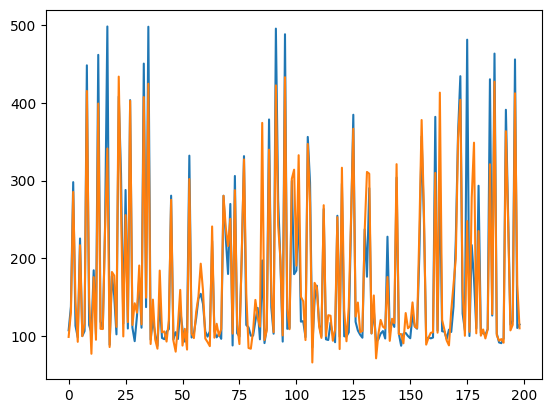

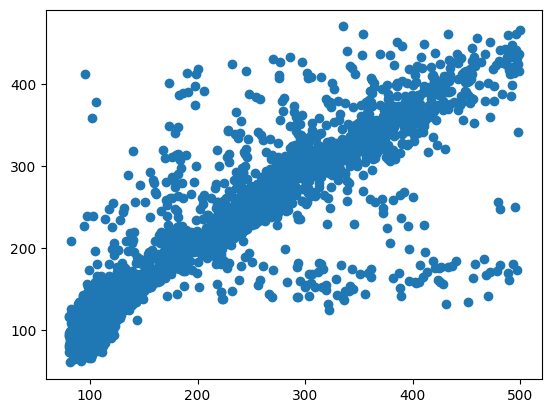

In [3]:
from sklearn import linear_model

# Create linear regression object
LR_model = linear_model.LinearRegression()

# Train the model using the training sets
LR_model.fit(X_train,y_train)

# Make predictions using the testing set
y_pred_LR = LR_model.predict(X_test)

plt.plot(y_test[1:200])
plt.plot(y_pred_LR[1:200])
plt.show()
plt.scatter(y_test,y_pred_LR)

In [4]:
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR)
MBE_LR=np.mean(y_test- y_pred_LR) #here we calculate MBE
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
cvRMSE_LR=RMSE_LR/np.mean(y_test)
NMBE_LR=MBE_LR/np.mean(y_test)
print(MAE_LR, MBE_LR,MSE_LR, RMSE_LR,cvRMSE_LR,NMBE_LR)

24.279488337227544 -0.07051199486693836 2005.5679659707434 44.78356803528213 0.25775396569437947 -0.000405835155690506


### Using Support Vector Regression - SVR
I'll be using SVR because:
- I trust this is not a linear problem, so I'll not try a Linear Regression model;
- SVR is less sensitive to outliers compared to some other regression techniques. This makes it suitable for datasets with outliers or noisy data like ours;

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the parameter grid
param_grid = {
    'svr__kernel': ['linear', 'rbf', 'poly'],  # Try different kernel functions
    'svr__C': [0.1, 1, 5],  # Regularization parameter for SVR
    'svr__gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
}

# Define the SVR model inside the pipeline
svr = SVR()

# Define the StandardScaler for preprocessing
scaler = StandardScaler()

# Create a pipeline with StandardScaler and SVR
pipeline = Pipeline([('scaler', scaler), ('svr', svr)])

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='r2')

# Fit the grid search object
grid_search.fit(X_train, y_train)

# Access the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'svr__C': 5, 'svr__gamma': 'auto', 'svr__kernel': 'rbf'}
Best Score: 0.8430277330702168


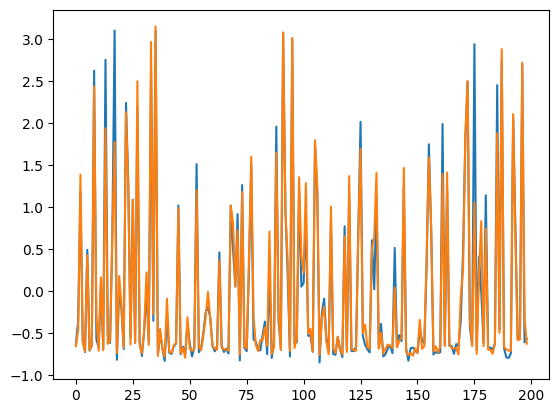

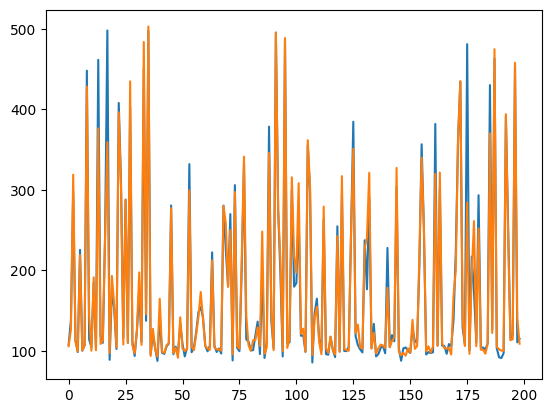

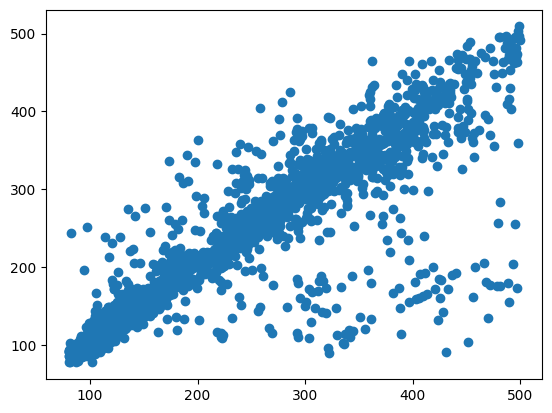

In [5]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

ss_X = StandardScaler()
ss_y = StandardScaler()
X_train_ss = ss_X.fit_transform(X_train)
y_train_ss = ss_y.fit_transform(y_train.reshape(-1,1))
y_train_ss = y_train_ss.ravel()

regr = SVR(kernel='rbf', C=5, gamma='auto')

regr.fit(X_train_ss,y_train_ss)
y_pred_SVR = regr.predict(ss_X.fit_transform(X_test))
y_test_SVR=ss_y.fit_transform(y_test.reshape(-1,1))#It is just one column we have to reshape, otherwise its a line
y_pred_SVR2=ss_y.inverse_transform(y_pred_SVR.reshape(-1,1))

plt.plot(y_test_SVR[1:200])
plt.plot(y_pred_SVR[1:200])
plt.show()
plt.plot(y_test[1:200])
plt.plot(y_pred_SVR2[1:200])
plt.show()
plt.scatter(y_test, y_pred_SVR2)

In [6]:
MAE_SVR=metrics.mean_absolute_error(y_test,y_pred_SVR2) 
MBE_SVR=np.mean(y_test- y_pred_SVR2) #here we calculate MBE
MSE_SVR=metrics.mean_squared_error(y_test,y_pred_SVR2)  
RMSE_SVR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_SVR2))
cvRMSE_SVR=RMSE_SVR/np.mean(y_test)
NMBE_SVR=MBE_SVR/np.mean(y_test)
print(MAE_SVR, MBE_SVR,MSE_SVR, RMSE_SVR,cvRMSE_SVR,NMBE_SVR)

15.596715902862915 2.9730351679388205 1474.207942293211 38.3954156416259 0.22098664935130236 0.017111445967890684


### Using Extreme Gradient Boosting - XGB
I'll be using XGB because:
- XGB provides feature importance scores, which can help in feature selection
- XGB has regularization techniques  that help prevent overfitting and improve generalization performance.

In [6]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],  # Learning rate
    'max_depth': [3, 5, 7, 10],  # Maximum depth of the tree
    'n_estimators': [5, 10, 15],  # Number of trees in the forest
    'min_child_weight': [1, 3, 7],  # Minimum sum of instance weight needed in a child
    'gamma': [0, 0.1, 0.2]  # Minimum loss reduction required to make a further partition
}
# Initialize XGBRegressor
xgb_model = XGBRegressor()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2')

# Fit the grid search object
grid_search.fit(X_train, y_train)

# Access the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'gamma': 0, 'learning_rate': 0.5, 'max_depth': 7, 'min_child_weight': 7, 'n_estimators': 10}
Best Score: 0.9005352315217856


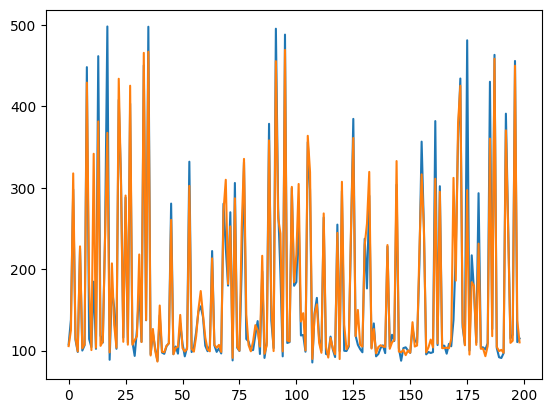

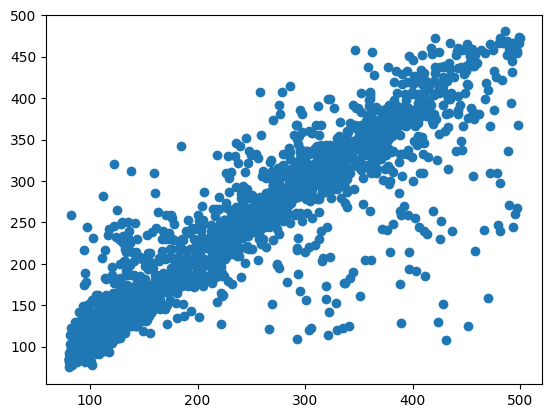

In [7]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# Define the XGBRegressor with best parameters
XGB_model = XGBRegressor(gamma=0, learning_rate=0.5, max_depth=7, min_child_weight=7, n_estimators=10)

XGB_model.fit(X_train, y_train)
y_pred_XGB =XGB_model.predict(X_test)

plt.plot(y_test[1:200])
plt.plot(y_pred_XGB[1:200])
plt.show()
plt.scatter(y_test,y_pred_XGB)

In [8]:
MAE_XGB=metrics.mean_absolute_error(y_test,y_pred_XGB) 
MBE_XGB=np.mean(y_test-y_pred_XGB)
MSE_XGB=metrics.mean_squared_error(y_test,y_pred_XGB)  
RMSE_XGB= np.sqrt(metrics.mean_squared_error(y_test,y_pred_XGB))
cvRMSE_XGB=RMSE_XGB/np.mean(y_test)
NMBE_XGB=MBE_XGB/np.mean(y_test)
print(MAE_XGB,MBE_XGB,MSE_XGB,RMSE_XGB,cvRMSE_XGB,NMBE_XGB)

15.596632067424938 0.08577051217514636 1128.999597450651 33.60058924261077 0.19338979690335592 0.000493656281146799


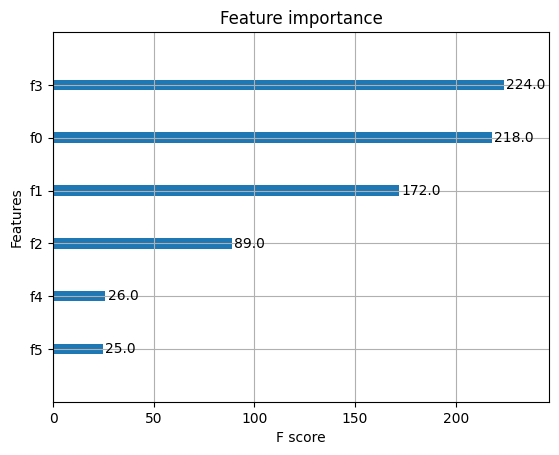

In [9]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(XGB_model)
plt.show()

### Resume of this three methods

With the last random seed tested:

For the LR:
> cvRMSE: 0.25775396569437947
>
> NMBE: -0.000405835155690506
> 
For the SVG:
> cvRMSE: 0.22098664935130236
>
> NMBE: 0.017111445967890684

For the XGB:
> cvRMSE: 0.19338979690335592
>
> NMBE: 0.000493656281146799

For the ASHRAE norm for the hourly prediction is 30% for cvRMSE and 10% for NMBE.

For the IPMVP norm the hourly prediction is 20% for cvRMSE and 5% for NMBE.

- Currently, with this training data and test data and this selectec features only XGB respect both norms. However LR model in the 2019 test probably will improve because the consumption is slighly bigger and this method has more flexibility.

Although I still want to try a Random Forest that I actually already did the GridSearch to optimize its hyperparameters and try NNs.

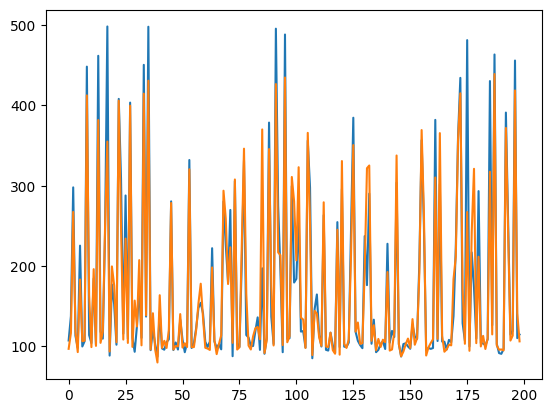

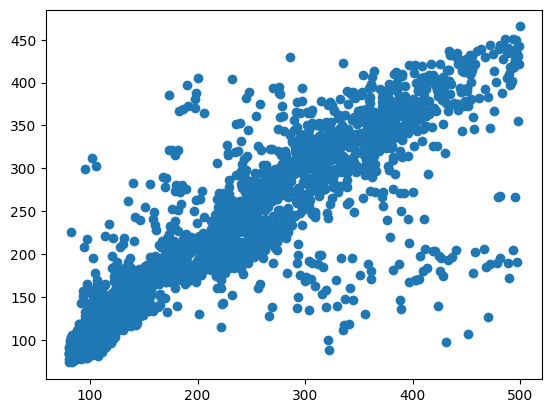

In [10]:
from sklearn.neural_network import MLPRegressor

# Define the parameters obtained from grid search
hidden_layer_sizes = (35, 15, 5, 3)  # Example value from the grid search results
solver = 'adam'  # Example value from the grid search results
alpha = 0.1  # Example value from the grid search results
learning_rate = 'adaptive'  # Example value from the grid search results

# Define the MLPRegressor with the tuned parameters
NN_model = MLPRegressor(activation = 'relu', hidden_layer_sizes=hidden_layer_sizes, solver=solver, alpha=alpha, learning_rate=learning_rate, max_iter=25000, random_state=21)

# Fit the model to the training data
NN_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_NN = NN_model.predict(X_test)

plt.plot(y_test[1:200])
plt.plot(y_pred_NN[1:200])
plt.show()
plt.scatter(y_test,y_pred_NN)

In [11]:
MAE_NN=metrics.mean_absolute_error(y_test,y_pred_NN)
MBE_NN=np.mean(y_test-y_pred_NN)
MSE_NN=metrics.mean_squared_error(y_test,y_pred_NN)  
RMSE_NN= np.sqrt(metrics.mean_squared_error(y_test,y_pred_NN))
cvRMSE_NN=RMSE_NN/np.mean(y_test)
NMBE_NN=MBE_NN/np.mean(y_test)
print(MAE_NN,MBE_NN,MSE_NN,RMSE_NN,cvRMSE_NN,NMBE_NN)

20.763538824660518 3.933039035668486 1710.910067637693 41.363148666871254 0.23806757858357155 0.022636794099917985


### Using Random Forest

I'll used the tuned hyperparameters found when I used random forest in feature selection but I bit "upgraded" to get better predictions.

Minimum hyperparameters:

- max_depth: 10
- min_samples_leaf: 4
- min_sample_split: 5
- n_estimators: 10

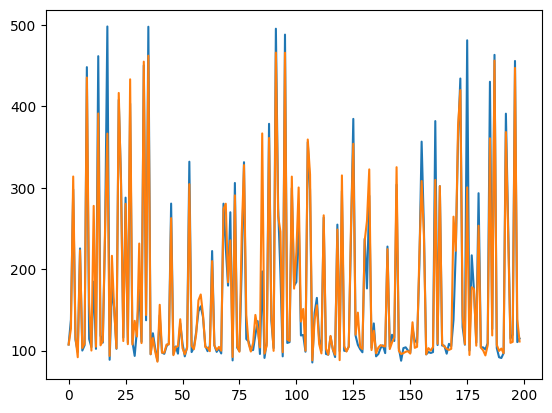

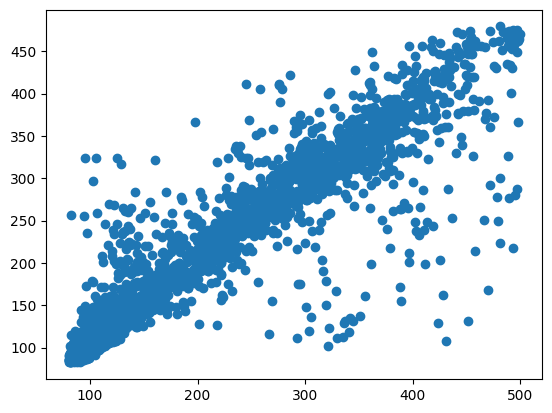

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Define the parameters
max_depth = 15
min_samples_leaf = 8
min_samples_split = 5
n_estimators = 25
bootstrap = True

# Define the RandomForestRegressor with the specified parameters
RF_model = RandomForestRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, n_estimators=n_estimators, bootstrap=bootstrap)

# Fit the model to the training data
RF_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_RF = RF_model.predict(X_test)

# Plotting the results
plt.plot(y_test[1:200])
plt.plot(y_pred_RF[1:200])
plt.show()
plt.scatter(y_test, y_pred_RF)

In [13]:
#Evaluate errors
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MBE_RF=np.mean(y_test-y_pred_RF) #here we calculate MBE
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
cvRMSE_RF=RMSE_RF/np.mean(y_test)
NMBE_RF=MBE_RF/np.mean(y_test)
print(MAE_RF,MBE_RF,MSE_RF,RMSE_RF,cvRMSE_RF,NMBE_RF)

15.51785218858128 -0.08163202568899737 1194.56198003588 34.56243596791002 0.19892575169018115 -0.0004698370244288638


## Saving Models

I'll save all the models, of course with different names, to test with the data of 2019 to see if the best models are still the best and, only then, decide what predicts best the 2019' hours and submit that one.

In [14]:
import pickle

#save LR model
with open('SVR_100278.pkl','wb') as file:
    pickle.dump(regr, file)

#save LR model
with open('XGB_100278.pkl','wb') as file:
    pickle.dump(XGB_model, file)

#save LR model
with open('NN_100278.pkl','wb') as file:
    pickle.dump(NN_model, file)

#save LR model
with open('RF_100278.pkl','wb') as file:
    pickle.dump(RF_model, file)
    
#save LR model
with open('LR_100278.pkl','wb') as file:
    pickle.dump(LR_model, file)